In [1]:
#Plot new data on torque from March 30, 2016 -- CKH
#The way I did the experiment, I am measuring the torsional spring constant at each angle.
#Steven was inflating to a fixed value, rotating to a variable angle 
#then measuring the force on the scale, it's kind of a more functional question "Can I press the elevator button hard enough from this angle"
#Those will be in a different file

#For k=2/n=24  (k2n24), k=3/n=18 (k3n18) and k=1/n=24 (k1n24) membranes

import numpy as np
k2n24sticklength=13 #stick length in cm, from center of membrane to where the corner of the stick hits the bump on the scale
#Need it for calculating torque
k2n24angleMidpoint=[5,28,52, 75, 94]#Average of start & stop angle for each measurement. Units: degrees
k2n24angleRange=[5,5,7,5,4]#Half the difference start and stop angle for each meas. this could be considered the angle range for which the measurement is valid
k2n24Weight=[4,6,9,10,12]#Scale weight in mm as I roll back from the stop angle to horizontal
k2n24PressureAvg=[0.15,0.47,0.70,0.90,1.2]#Kept track of the pressure in psi on the 0-3psi gauge-- this is avg of start & stop values for each meas
k2n24PressureRange=[0.15,0.05,0.05,0.05,0.1] #and half the difference between the start and stop pressure
k2n24TorqueNm=[weight/101.97*k2n24sticklength*0.01 for weight in k2n24Weight]

k2n24TorqueNm #check it out

[0.004707266843189174,
 0.00706090026478376,
 0.01059135039717564,
 0.011768167107972934,
 0.01412180052956752]

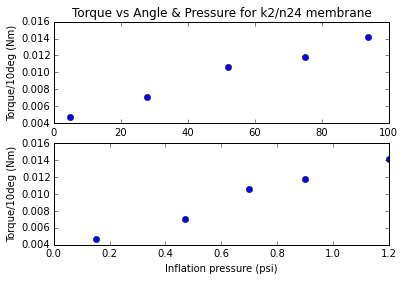

In [5]:
#Plot the torque exerted at each angle and at each pressure
#I am unsettled about this
#Instead of torque, shouldn't it be torque per degree? Like, it takes
#t amount of torque to push back the rotation by d degrees
#I think we can beter measure the "spring constant:" for a linear spring f=kx, k = delta f/delta x where k might be non uniform in x
#Here we have t= k * alpha so could measure k = delta t/delta angle = k2n24TorqueNm/(2*k2n24angleRange) at each angle
%matplotlib inline
from matplotlib import pyplot as plt

plt.subplot(2,1,1)
plt.plot(k2n24angleMidpoint,k2n24TorqueNm,'bo')
plt.title('Torque vs Angle & Pressure for k2/n24 membrane')
plt.xlabel('Rotation angle (degrees)')
plt.ylabel('Torque/10deg (Nm)')
plt.subplot(2,1,2)
plt.plot(k2n24PressureAvg,k2n24TorqueNm,'bo')
plt.xlabel('Inflation pressure (psi)')
plt.ylabel('Torque/10deg (Nm)')

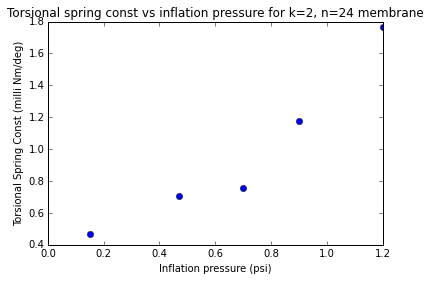

In [11]:
#Still need to divide each torque value by angular range to get the spring constant
k2n24TorsSprConst=np.divide (k2n24TorqueNm,k2n24angleRange)/2*1000 #put into milli newtons
k2n24TorsSprConst
plt.plot(k2n24PressureAvg,k2n24TorsSprConst,'bo')
plt.xlabel('Inflation pressure (psi)')
plt.ylabel('Torsional Spring Const (milli Nm/deg)')
plt.title('Torsional spring const vs inflation pressure for k=2, n=24 membrane')